In [10]:
import pandas as pd 
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt


First we retrieve the performances of the AVG n=2 model for each 500 predictions

In [11]:
path = "streaming/scalability_tests/AVG_N_2/nb_predictions_"
nb_pred = 67
data_frame_list = []
for i in range(nb_pred):
    
    filepath = f"{path}{i}/part-00000"
    file_exists = exists(filepath)
    if file_exists:
        data_frame = pd.read_csv(filepath,  names=["Sensor", "MSE", "Error", "nb_pred"])
        data_frame["prediction_index"] = i
        data_frame_list.append(data_frame[["Sensor", "MSE", "prediction_index"]])
avg_2 = pd.concat(data_frame_list)
#persistance.query("Sensor == 'CEE016'")

We then plot the performance for each sensors

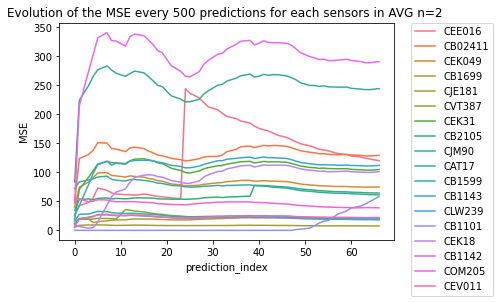

In [23]:
sns.lineplot(data=avg_2, x="prediction_index", y="MSE", hue="Sensor").set(title="Evolution of the MSE every 500 predictions for each sensors in AVG n=2 ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Clearly not all sensors have same performances. For most of them there is an increase from 0 to 15, then a decrease from 15 to 30, then a new increase where the models begins to stabelize

Now we do the same for the RLS 4 model

In [15]:
path = "streaming/scalability_tests/RLS_4_nb_predictions_"
nb_pred = 67
data_frame_list = []
for i in range(nb_pred):
    
    filepath = f"{path}{i}/part-00000"
    file_exists = exists(filepath)
    if file_exists:
        data_frame = pd.read_csv(filepath,  names=["Sensor", "MSE", "Error", "nb_pred"])
        data_frame["prediction_index"] = i
        data_frame_list.append(data_frame[["Sensor", "MSE", "prediction_index"]])
RLS_model = pd.concat(data_frame_list)
#persistance.query("Sensor == 'CEE016'")

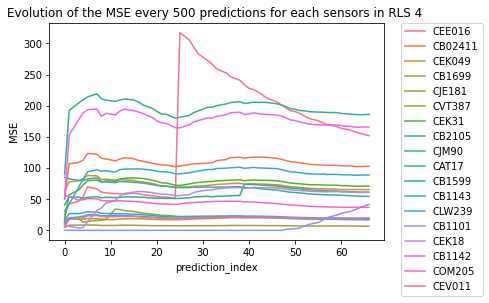

In [19]:
sns.lineplot(data=persistance, x="prediction_index", y="MSE", hue="Sensor").set(title="Evolution of the MSE every 500 predictions for each sensors in RLS 4 ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Same pattern encountered as previously but with lower max MSE

We notice a high increase of the MSE around 24 for the CEE016 sensor, other than than the performs seems very stable with some fluctation between 20 and 30

Let us compare the mean of MSE for each sensors at each 500 predictions

<AxesSubplot:title={'center':'Mean MSE over each sensor every 500 predictions'}, xlabel='prediction_index'>

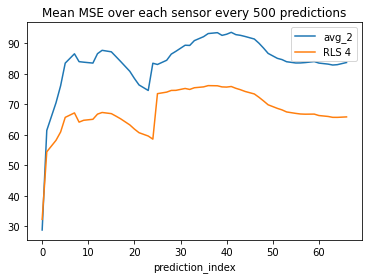

In [22]:
avg_2_mean = avg_2.groupby(["prediction_index"])["MSE"].mean().rename("avg_2")
RLS_model_mean = RLS_model.groupby(["prediction_index"])["MSE"].mean().rename("RLS 4")
pd.concat([avg_2_mean, RLS_model_mean], axis=1).dropna().plot(title="Mean MSE over each sensor every 500 predictions")

We observe that the two lines follow the same pattern but avg_2 has a better mean MSE